In [5]:
! pip3 install pandas #导入pandas模块

  Using cached https://files.pythonhosted.org/packages/39/73/99aa822ee88cef5829607217c11bf24ecc1171ae5d49d5f780085f5da518/pandas-0.25.1-cp37-cp37m-macosx_10_9_x86_64.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b4/e8/5ececadd9cc220bb783b4ce6ffaa9266925d37ed41237bc23bc530ab4f3d/numpy-1.17.2-cp37-cp37m-macosx_10_6_intel.whl
     |████████████████████████████████| 512kB 118kB/s eta 0:00:01


In [79]:
# 数据读取
import pandas as pd
df = pd.read_csv('titanic.csv',index_col=0) 
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
#显示数据信息
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
#查看缺失值
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
! pip3 install matplotlib #导入matplotlib模块

     |████████████████████████████████| 14.4MB 68kB/s eta 0:00:014
     |████████████████████████████████| 71kB 45kB/s eta 0:00:01
     |████████████████████████████████| 122kB 39kB/s eta 0:00:01


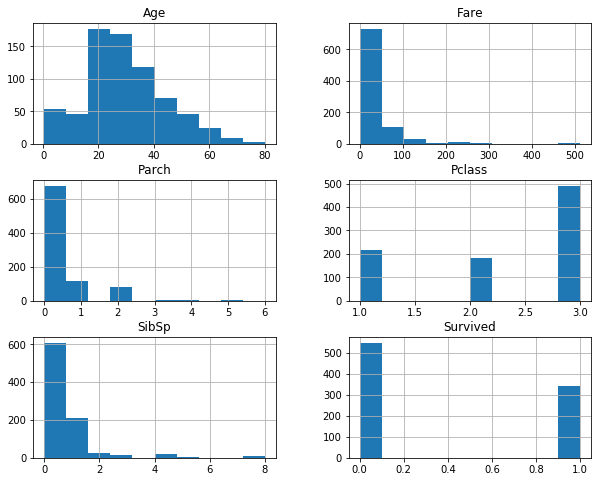

In [82]:
# 查看数据分布
import matplotlib.pyplot as plt 
df.hist(figsize=(10,8)) 
plt.show()

In [83]:
#去除多余属性
df = df.drop(['Name','Ticket','Cabin'],axis=1) 
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [84]:
#设置age缺失值
mean_age = df['Age'].mean() 
tmp = df['Age'].copy() 
tmp[df.Age.isnull()] = mean_age 
df['Age_fill'] = tmp
del tmp
df = df.drop(['Age'],axis=1) 
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_fill'],
      dtype='object')

In [30]:
! pip3 install sklearn #导入sklearn模块

In [31]:
#将离散变量转化为编码
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df_sex = le.fit(df['Sex'])
df['Sex'] = df_sex.transform(df['Sex'])
df = df.dropna()
df_embarked = le.fit(df['Embarked'])
df['Embarked'] = df_embarked.transform(df['Embarked']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int64
Age_fill    889 non-null float64
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [32]:
#划分自变量和因变量，训练集和测试集
X = df.loc[:,df.columns!='Survived']
y = df.loc[:,df.columns=='Survived']

In [33]:
from sklearn.model_selection import train_test_split 
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y)
X_tr .shape,X_ts.shape

((666, 7), (223, 7))

In [34]:
#建立决策树模型
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_tr,y_tr)

In [35]:
#建立逻辑回归模型
from sklearn.linear_model import LogisticRegression 
log = LogisticRegression(class_weight='balanced') 
log.fit(X_tr,y_tr.values.ravel())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#查看矩阵
y_dct_pred = dtc.predict(X_ts)
y_log_pred = log.predict(X_ts)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix 
confusion_matrix(y_ts,y_dct_pred)


array([[108,  29],
       [ 32,  54]])

In [38]:
confusion_matrix(y_ts,y_log_pred)

array([[106,  31],
       [ 23,  63]])

In [39]:
#打印矩阵评分
print(classification_report(y_ts,y_dct_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       137
           1       0.65      0.63      0.64        86

    accuracy                           0.73       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.72      0.73      0.73       223



In [40]:
print(classification_report(y_ts,y_log_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       137
           1       0.67      0.73      0.70        86

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



In [76]:
#打印准确值
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(dtc,X,y,cv=5,scoring='accuracy') 
scores.mean() #决策树


0.7739478194629594

In [73]:
scores = cross_val_score(log,X,y.values.ravel(),cv=5,scoring='accuracy') 
scores.mean() # 罗辑回归

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

0.7750523709769568


## 1. 本试验中，决策树模型在测试集上 f1-score 0.73
## 2. 本试验中，逻辑回归模型在测试集上 f1-score 得分0.76，略 高于决策树模型。
## 3. 5 折交叉验证显示，决策树模型准确率 0.76。
## 4. 5 折交叉验证显示，逻辑回归模型准确率 0.77。
## 5. 综上，本试验中，逻辑回归模型和决策树模型差异不大。


In [44]:

import pandas as pd
df = pd.read_csv('titanic.csv',index_col=0) 
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

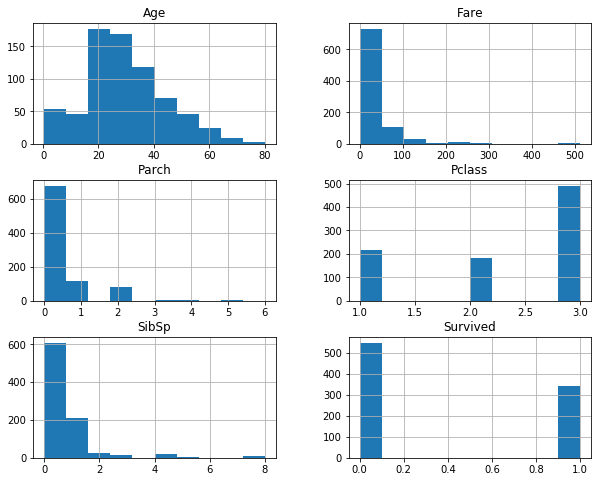

In [47]:
import matplotlib.pyplot as plt 
df.hist(figsize=(10,8)) 
plt.show()

In [48]:
df = df.drop(['Name','Ticket','Cabin'],axis=1) 
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [50]:
mean_age = df['Age'].mean() 
tmp = df['Age'].copy() 
tmp[df.Age.isnull()] = mean_age 
df['Age_fill'] = tmp
del tmp
df = df.drop(['Age'],axis=1) 
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_fill'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df_sex = le.fit(df['Sex'])
df['Sex'] = df_sex.transform(df['Sex'])
df = df.dropna()
df_embarked = le.fit(df['Embarked'])
df['Embarked'] = df_embarked.transform(df['Embarked']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int64
Age_fill    889 non-null float64
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [54]:
X = df.loc[:,df.columns!='Survived'] 
y = df.loc[:,df.columns=='Survived']

In [56]:
from sklearn.model_selection import train_test_split 
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y)
X_tr .shape,X_ts.shape

((666, 7), (223, 7))

In [57]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_tr,y_tr)


In [59]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(dtc,X,y,cv=5,scoring='accuracy') 
scores.mean()

0.7705643369516918

In [62]:
# 使用格搜索优化决策树模型
from sklearn.model_selection import GridSearchCV 
parameters={'min_samples_split' : list(range(2,6,1)),
    'max_depth': list(range(6,19,2)), 
    'criterion':('gini','entropy'), 
    'min_samples_leaf':list(range(2,9,2))}
clf = DecisionTreeClassifier()
gs = GridSearchCV(estimator=clf, param_grid = parameters, 
scoring='accuracy',iid=False,cv=5,return_train_score=True) 
gs.fit(X_tr, y_tr)
gs.best_params_, gs.best_score_

({'criterion': 'gini',
  'max_depth': 8,
  'min_samples_leaf': 6,
  'min_samples_split': 2},
 0.8078891257995735)

In [65]:
# 使用优化后的超参数建模并预测
dtc_best = gs.best_estimator_ 
dtc_best.fit(X_tr,y_tr)
y_pred = dtc_best.predict(X_ts) 
y_pred[0:5]

array([0, 0, 0, 0, 1])

In [77]:
# 打印预测值
scores = cross_val_score(dtc_best,X,y,cv=5,scoring='accuracy') 
scores.mean() #超参数后的决策树

0.8223068621849807

## 1. 本试验中，决策树模型 5 折交叉验证准确率 0.77。
## 2. 本试验中，优化后的决策树模型 5 折交叉验证准确率 0.822。
'criterion': 'gini',
  'max_depth': 8,
  'min_samples_leaf': 6,
  'min_samples_split': 2},